## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_csv('data/diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Visualization

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

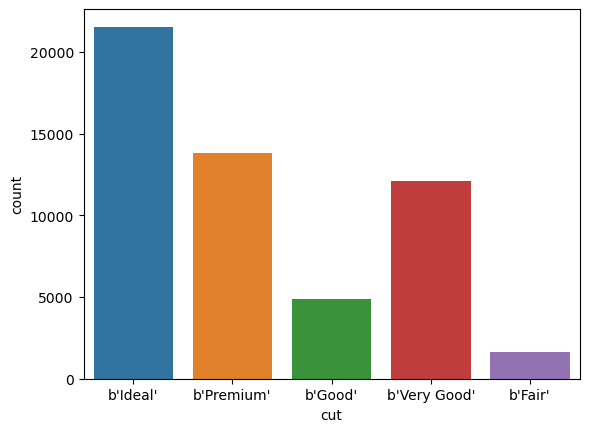

In [7]:
sns.countplot(df['cut'])

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

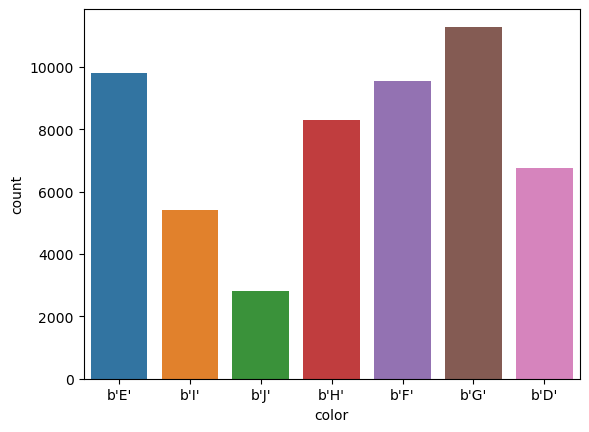

In [8]:
sns.countplot(df['color'])

<Figure size 1500x1000 with 0 Axes>

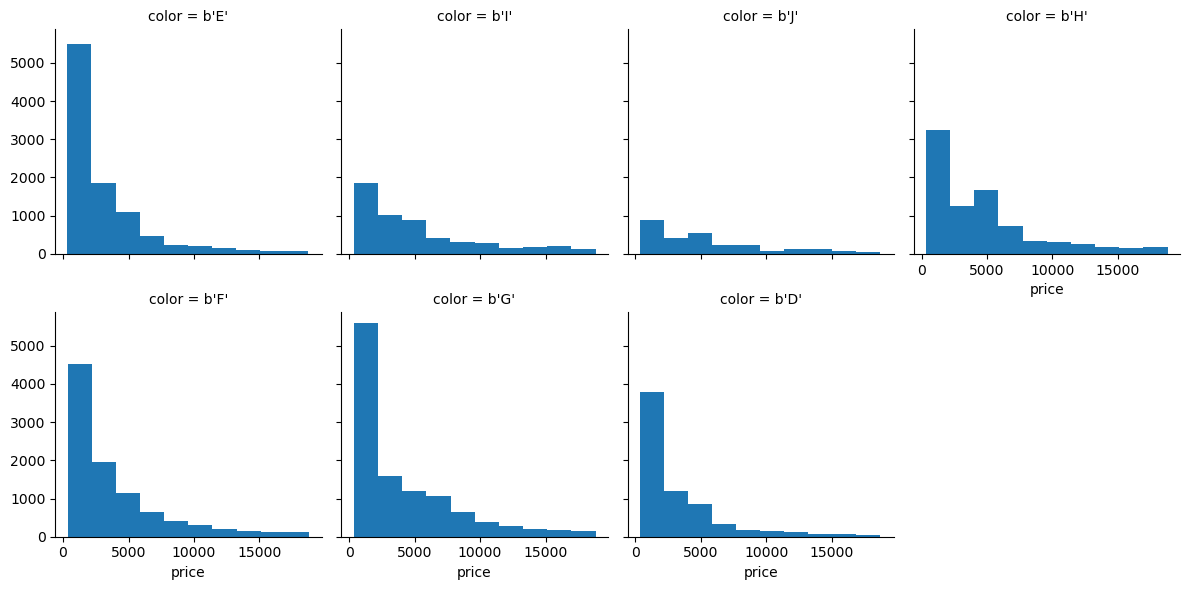

In [9]:
plt.figure(figsize = (15, 10))
graph = sns.FacetGrid(df, col = 'color', col_wrap = 4)
graph.map(plt.hist, 'price', bins = 10)

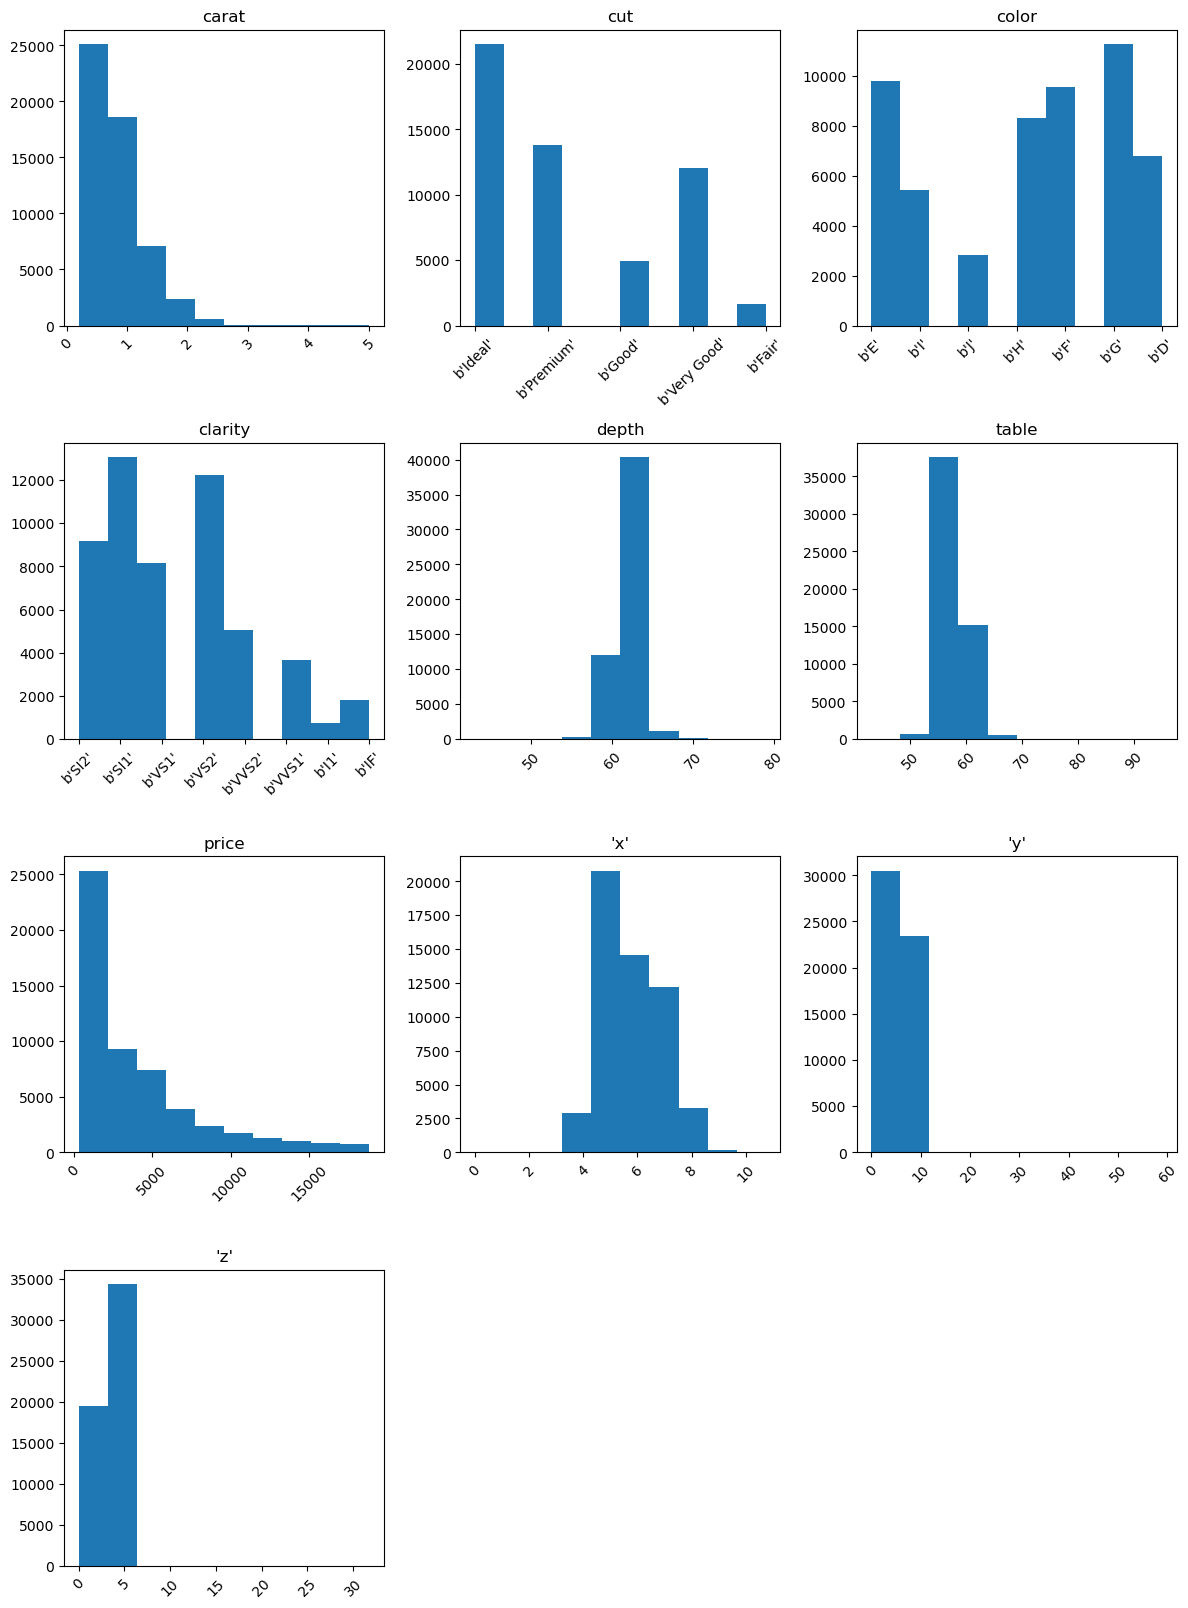

In [10]:
lista_colunas = list(df.columns)
plt.figure(figsize = (12,20))
for i in range(len(lista_colunas)):
    plt.subplot(5, 3, i + 1)
    plt.title(lista_colunas[i])
    plt.xticks(rotation = 45)
    plt.hist(df[lista_colunas[i]])
    
plt.tight_layout()

## Data processing

In [11]:
from sklearn.preprocessing import OrdinalEncoder

for col in df.columns:
    if df[col].dtype == "object":
        oe = OrdinalEncoder()
        oe.fit(df[[col]])
        df[col] = oe.fit_transform(df[[col]])

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,2.0,1.0,3.0,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,335.0,4.34,4.35,2.75


## Separating the data

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis = 1)
y = df['price']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Instantiation

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 0)
et = ExtraTreesRegressor(random_state = 0)

## Training

In [15]:
rf.fit(xtrain, ytrain)
predict_rf = rf.predict(xtest)

et.fit(xtrain, ytrain)
predict_et = et.predict(xtest)

## Results

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R2 Score: ', r2_score(ytest, predict_rf))
print("MSE: ", mean_squared_error(ytest, predict_rf))
print("MAE: ", mean_absolute_error(ytest, predict_rf))

R2 Score:  0.8350869974955668
MSE:  2633902.821233369
MAE:  1019.6882639516108


In [17]:
print('R2 Score: ', r2_score(ytest, predict_et))
print("MSE: ", mean_squared_error(ytest, predict_et))
print("MAE: ", mean_absolute_error(ytest, predict_et))

R2 Score:  0.9815347665447832
MSE:  294916.89408250834
MAE:  265.44066629588434


## With ExtraTreesRegressor, I had very pleasant results, THE END :)

_